# ***Pre-Process Example***

This notebook shows example of the preprocess.

### ***Import packages***

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from pyimzml.ImzMLParser import ImzMLParser, getionimage
from spectrum_utils import SpectrumUtils

### ***Define variables***

Define constant variables:

In [2]:
# define the lowest mz value in spectrum
MZ_START = 49

# define the largest mz value in spectrum
MZ_END = 1201

# define the spectrum mass resultion
MASS_RESOLUTION = 0.025

# create spectrum bins using spectrum lowest and largest
# mz value and spectrum mass resultion
BINS = np.around(np.arange(MZ_START, MZ_END, MASS_RESOLUTION/2), 5)

Define non constant but global variables:

In [4]:
# path to imzML-DESI file
imzml_file = 'imzml-DESI/HG 11-11-12-s.imzML'

### ***Show changes in single spectrum:***

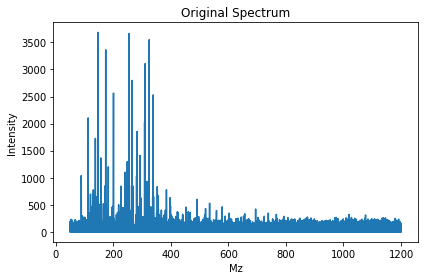

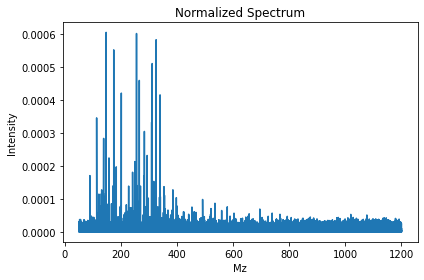

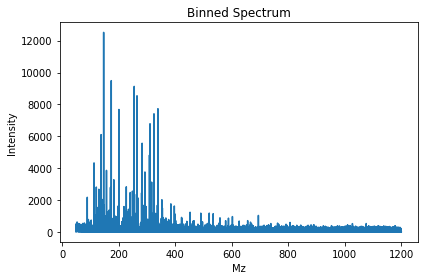

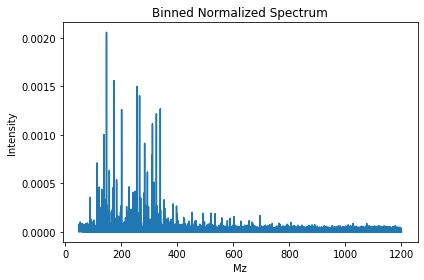

In [6]:
# parse imzML file
p = ImzMLParser(imzml_file)

# get index 0 spectrum
original_mzs, original_intensities = p.getspectrum(0)

# normalize spectrum
normalized_mzs, normalize_intensities = SpectrumUtils().normalize_spectrum(
    (original_mzs, original_intensities))

#  bin spectrum
binned_mzs, binned_intensities = SpectrumUtils().bining_spectrum(
    (original_mzs, original_intensities), BINS)

# normalize and bin spectrum
binned_normalized_mzs, binned_normalized_intensities = (
    SpectrumUtils().bining_spectrum(
        SpectrumUtils().normalize_spectrum(
            (original_mzs, original_intensities)), BINS))

# left top subplot
plt.plot(original_mzs, original_intensities)
plt.xlabel('Mz')
plt.ylabel('Intensity')
plt.title('Original Spectrum')
plt.tight_layout()
plt.show()

# right top subplot
plt.plot(normalized_mzs, normalize_intensities)
plt.xlabel('Mz')
plt.ylabel('Intensity')
plt.title('Normalized Spectrum')
plt.tight_layout()
plt.show()

# left bottom subplot
plt.plot(binned_mzs, binned_intensities)
plt.xlabel('Mz')
plt.ylabel('Intensity')
plt.title('Binned Spectrum')
plt.tight_layout()
plt.show()

# right bottom subplot
plt.plot(binned_normalized_mzs, binned_normalized_intensities)
plt.xlabel('Mz')
plt.ylabel('Intensity')
plt.title('Binned Normalized Spectrum')
plt.tight_layout()
plt.show()